Importing the librairies


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report,precision_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
data = pd.read_csv('data\Tumeurs.csv')

In [3]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [4]:
X = X/255

### Reduce to have the same size in dataset

Before we have to compute to have the same size : 

In [5]:
data_to_reduce4 = data[data['label']== 4]
print(len(data_to_reduce4))
data_to_reduce4 = data_to_reduce4.sample(frac=0.015, replace=True, random_state=0)
print(len(data_to_reduce4))

data_to_reduce6 = data[data['label']== 6]
data_to_reduce6 = data_to_reduce6.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce2 = data[data['label']== 2]
data_to_reduce2 = data_to_reduce2.sample(frac=0.091, replace=True, random_state=0)

data_to_reduce1 = data[data['label']== 1]
data_to_reduce1 = data_to_reduce1.sample(frac=0.2, replace=True, random_state=0)

data_to_reduce0 = data[data['label']== 0]

data_to_reduce0 = data_to_reduce0.sample(frac=0.33, replace=True, random_state=0)

data_to_reduce5 = data[data['label']== 5]
data_to_reduce3 = data[data['label']== 3]


data_stabled = pd.concat((data_to_reduce4, data_to_reduce6, data_to_reduce2, data_to_reduce1, data_to_reduce0, data_to_reduce5,data_to_reduce3))

6705
101


In [6]:
data_stabled


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
5707,169,170,172,174,160,173,177,173,172,169,...,177,176,170,154,148,121,133,165,165,4
5582,165,170,172,171,170,168,171,177,184,187,...,169,167,169,172,172,177,170,161,154,4
4628,166,171,176,177,178,164,172,180,181,178,...,169,166,171,172,170,165,156,162,164,4
6239,175,172,169,179,171,162,165,159,160,165,...,162,158,160,168,172,170,174,172,167,4
7908,161,159,159,163,164,163,163,163,162,159,...,162,160,160,161,159,160,162,159,156,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,207,209,212,208,204,203,209,217,218,218,...,213,210,218,219,215,212,205,199,199,3
1206,173,187,193,191,197,195,198,203,201,199,...,194,194,199,201,207,202,190,181,182,3
1207,180,188,179,172,175,181,178,174,172,174,...,137,143,146,147,150,152,149,148,142,3
1208,160,161,162,165,164,156,155,160,168,166,...,162,158,157,157,157,153,153,154,151,3


The data is stable. Let's create our NN 

In [7]:
y = data_stabled['label'].copy()
X = data_stabled.drop('label', axis=1).copy()

X = np.array(X)
X = X.reshape(770 ,28,28,1)

#X = X.reshape(4408,28,28,1)

#Scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)


In [8]:
y.value_counts()

5    142
3    115
0    108
1    103
4    101
6    101
2    100
Name: label, dtype: int64

Callback 

In [9]:
early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [10]:
model =tf.keras.models.Sequential([
    #tf.keras.layers.GaussianBlur(sigma=(0, 3.0)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (28, 28, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    #tf.keras.layers.Conv2D(128,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    #
    # tf.keras.layers.BatchNormalization(),
  
    
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.Conv2D(256,(3,3),activation = "relu") , 
    #tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate = 0.15), #Important parameter
    # tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.GlobalAveragePooling2D(),
    
    #tf.keras.layers.Dense(units = 256, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 128, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(units = 64, activation = 'relu'), 
    #tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(), #Convert 3d in 1d features vectors 
    #tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(7,activation = "softmax")])

In [11]:
#model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100,callbacks = [early], validation_data=(X_val, y_val))
#history = model.fit(X_train, y_train, epochs=100,callbacks = [early])

Epoch 1/100


c:\Users\mathi\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


16/16 [==============================] - 1s 22ms/step - loss: 2.5020 - accuracy: 0.1938 - val_loss: 13.6558 - val_accuracy: 0.1481
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 1.8557 - accuracy: 0.2247 - val_loss: 7.8989 - val_accuracy: 0.1667
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 1.7736 - accuracy: 0.2454 - val_loss: 7.3519 - val_accuracy: 0.1481
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 1.7041 - accuracy: 0.3093 - val_loss: 3.6668 - val_accuracy: 0.1667
Epoch 5/100
16/16 [==============================] - 0s 17ms/step - loss: 1.6864 - accuracy: 0.3216 - val_loss: 2.8266 - val_accuracy: 0.2407
Epoch 6/100
16/16 [==============================] - 0s 16ms/step - loss: 1.7176 - accuracy: 0.3155 - val_loss: 2.3994 - val_accuracy: 0.1111
Epoch 7/100
16/16 [==============================] - 0s 17ms/step - loss: 1.6816 - accuracy: 0.3093 - val_loss: 2.2169 - val_accuracy: 0.1111
Epoch 8/100
16/16

In [12]:
model_acc = model.evaluate(X_test, y_test)[1]

print("Test Accuracy: {:.3f}%".format(model_acc * 100))

8/8 [==============================] - 0s 5ms/step - loss: 1.6633 - accuracy: 0.4242
Test Accuracy: 42.424%


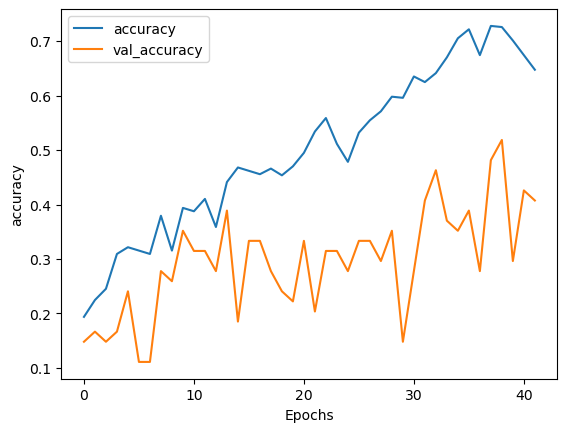

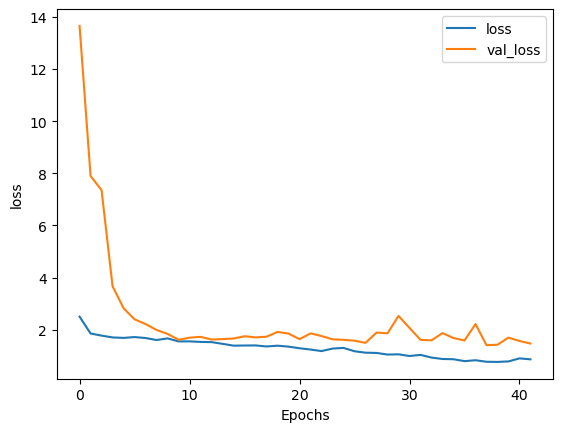

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [37]:
y_true = np.array(y_test)

label_mapping = {
    0: 'nv',
    1: 'mel',
    2: 'bkl',
    3: 'bcc',
    4: 'akiec',
    5: 'vasc',
    6: 'df'
}

y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))

cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=label_mapping.values())

              precision    recall  f1-score   support

           0       0.21      0.90      0.34        30
           1       0.11      0.07      0.09        29
           2       0.33      0.15      0.21        27
           3       0.45      0.14      0.21        37
           4       0.62      0.15      0.24        34
           5       0.63      0.27      0.38        44
           6       0.36      0.43      0.39        30

    accuracy                           0.29       231
   macro avg       0.39      0.30      0.27       231
weighted avg       0.41      0.29      0.27       231



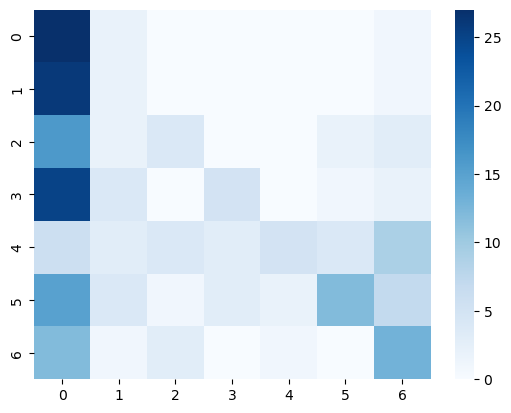

In [38]:
import seaborn as sn

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr2 = classification_report(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, cmap='Blues')
print(cr2)
#print(cm) 

That's better.. Really 